In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./datasets/P1_movies_metadata.csv")
data.head()

C:\Users\SVM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
data.dtypes

adult                     object
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
profit                   float64
dtype: object

In [6]:
data['budget']=pd.to_numeric(data['budget'],errors='coerce')
data['runtime']=pd.to_numeric(data['runtime'],errors='coerce')
data['profit'] = data['revenue']-data['budget']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = data.corr()
print(corr)

                budget   revenue   runtime  vote_average  vote_count    profit
budget        1.000000  0.768776  0.134733      0.073494    0.676642  0.614339
revenue       0.768776  1.000000  0.103917      0.083868    0.812022  0.976896
runtime       0.134733  0.103917  1.000000      0.158146    0.113539  0.083189
vote_average  0.073494  0.083868  0.158146      1.000000    0.123607  0.078916
vote_count    0.676642  0.812022  0.113539      0.123607    1.000000  0.775756
profit        0.614339  0.976896  0.083189      0.078916    0.775756  1.000000


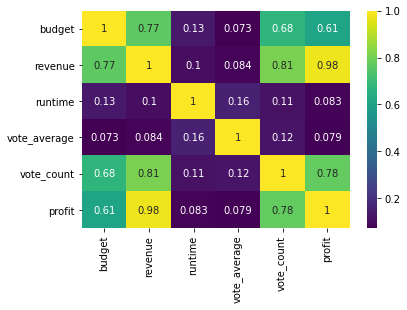

In [8]:
sn.heatmap(corr, annot=True,cmap='viridis')
plt.show()

In [13]:
from collections import Counter
genres_json = list(data['genres'])

import json
genres_clean = []
for g in genres_json:
    g = g.replace("\'","\"")
    genres_clean.append(json.loads(g))
    
genres = []
for a in genres_clean:
    for b in a:
        genres.append(b['name'])
        
g_counts = dict(Counter(genres))
g_counts

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Foreign': 1622,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042,
 'TV Movie': 767,
 'Carousel Productions': 1,
 'Vision View Entertainment': 1,
 'Telescene Film Group Productions': 1,
 'Aniplex': 1,
 'GoHands': 1,
 'BROSTA TV': 1,
 'Mardock Scramble Production Committee': 1,
 'Sentai Filmworks': 1,
 'Odyssey Media': 1,
 'Pulser Productions': 1,
 'Rogue State': 1,
 'The Cartel': 1}